# [HW1]

#### Problem : Assuming that the (unknown) true model , we'll be fitting a polynomial model to sampled data with changing the degree of a polynomial function. $h(x) = w_0 + w_1x^1 + w_2x^2 + ... + w_dx^d.$ for understanding the concept of over-fitting as well as model selction.

# ** CONTENTS**

1. [Training Data](#1)
2. [Validation Data](#2)
3. [Plot f(x) and Training Data](#3)
4. [Polynomial Degree](#4)
5. [Plot MSE](#5)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
np.random.seed(24)

<a id='1'></a>
# **1. Training data**

**Make a training data $x_{train}$**, which is evenly spaced 21 numbers over $[-\pi, \pi]$, and $y_{train} = f(x_{train}) + \epsilon$ where $\epsilon$ ~ $N(0, 0.5^2)$ is i.i.d. samples from Gaussian distribution.

In [9]:
x_train = np.linspace(-np.pi, np.pi, 21)
x_train

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265])

In [10]:
noise_21 = np.random.normal(0, 0.5, 21)
noise_21

array([ 0.66460609, -0.38501673, -0.15814018, -0.49540519, -0.53540813,
       -0.71935664,  0.28220843,  0.14786094, -0.81320212,  0.1097826 ,
        0.3394024 ,  0.94463637,  0.4807692 ,  0.0520056 , -0.24058266,
        0.42511427,  0.72671233,  0.52886872,  0.0827808 ,  0.25750919,
       -0.66846784])

In [11]:
y_train = np.sin(x_train) + noise_21
y_train

array([ 0.66460609, -0.69403372, -0.74592543, -1.30442219, -1.48646464,
       -1.71935664, -0.66884809, -0.66115605, -1.40098737, -0.1992344 ,
        0.3394024 ,  1.25365336,  1.06855445,  0.86102259,  0.71047386,
        1.42511427,  1.67776885,  1.33788571,  0.67056606,  0.56652618,
       -0.66846784])

<a id='2'></a>
# **2. Validation data**

**Make a validation data $x_{val}$**, which is evenly spaced 10 numbers over $[-\pi, \pi]$, and $y_{val} = f(x_{val}) + \epsilon$ where $\epsilon$ ~ $N(0, 0.5^2)$ is i.i.d. samples from Gaussian distribution.

In [12]:
x_val = np.linspace(-np.pi, np.pi, 10)
x_val

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

In [13]:
noise_10 = np.random.normal(0, 0.5, 10)
noise_10

array([ 0.28143057,  0.69642741, -0.03166399,  0.06083418,  0.60380127,
       -0.00102011,  0.81389787,  0.17724639,  0.51876382, -0.19284176])

In [14]:
y_val = np.sin(x_val) + noise_10
y_val

array([ 0.28143057,  0.0536398 , -1.01647174, -0.80519122,  0.26178113,
        0.34100004,  1.67992328,  1.16205415,  1.16155143, -0.19284176])

<a id='3'></a>
# **3. Plot f(x) and training data**

Plot the true model and training data as follows: <br> Add xlabel, ylabel, title, and legend <br>

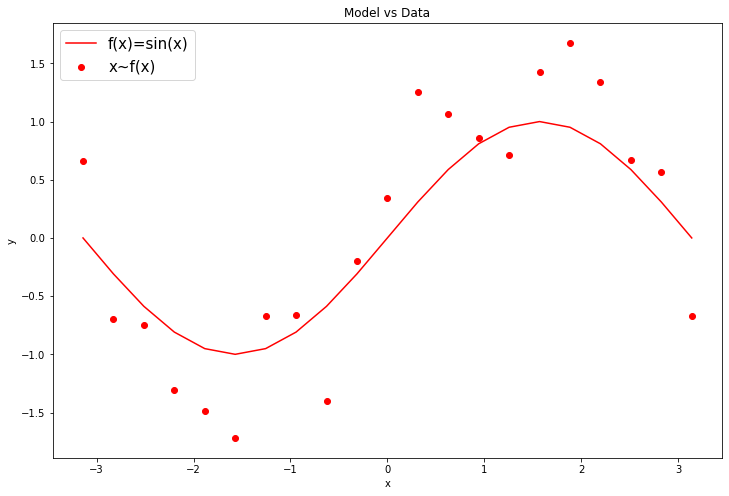

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(x_train, np.sin(x_train), color='r', label='f(x)=sin(x)')
plt.scatter(x_train, y_train, color='r', label='x~f(x)')
plt.title('Model vs Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 15}, loc='upper left')
plt.show()

<a id='4'></a>
# **4. Ploynomial Degree**

Repeat the following steps by changing the polynomial degree from 0 to 9

In [16]:
parameters = [i for i in range(10)]
x_poly_total = []
OMP = [] #optimal model parameter
mse_train = [] 
mse_val = [] 
y_train_pred_all = [] 
y_val_pred_all = [] 
for parameter in parameters:
    LR = LinearRegression()
    PF = PolynomialFeatures(degree=parameter)
    x_train_poly = PF.fit_transform(x_train.reshape(-1, 1))
    x_val_poly = PF.fit_transform(x_val.reshape(-1, 1))
    x_poly_total.append(x_train_poly)
    LR.fit(x_train_poly, y_train)
    OMP.append(LR.coef_)
    y_train_pred = LR.predict(x_train_poly)
    y_val_pred = LR.predict(x_val_poly)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_val.append(mean_squared_error(y_val, y_val_pred))
    y_train_pred_all.append(y_train_pred)
    y_val_pred_all.append(y_val_pred)

### (1) Fit $d$-th order polynomial to the training data and estimate the optimal model parameters/coefficients $w^*$

In [17]:
w = pd.DataFrame(OMP).T
w.columns = ['d'+str(i) for i in range(0, 10)]
w.index = ['r'+str(i) for i in range(1, 11)]
w

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
r1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
r2,NaN,0.326685,0.326685,1.253035,1.253035,1.138799,1.138799,1.306287,1.306287,1.412945
r3,NaN,NaN,-0.022503,-0.022503,-0.088373,-0.088373,-0.206193,-0.206193,-0.513844,-0.513844
r4,NaN,NaN,NaN,-0.142643,-0.142643,-0.092698,-0.092698,-0.236907,-0.236907,-0.390954
r5,NaN,NaN,NaN,NaN,0.007133,0.007133,0.040509,0.040509,0.204267,0.204267
r6,NaN,NaN,NaN,NaN,NaN,-0.004198,-0.004198,0.026048,0.026048,0.084979
r7,NaN,NaN,NaN,NaN,NaN,NaN,-0.002303,-0.002303,-0.029671,-0.029671
r8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001778,-0.001778,-0.010003
r9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001408,0.001408
r10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000378


### (2)  Get your model predictions $\hat{y}_{train}$ and $\hat{y}_{val}$ from $x_{train}$ and $x_{val}$.

#### We already put all $\hat{y}_{train}$ in (y_train_pred_all).  Just print all $\hat{y}_{train}$

In [18]:
y_train_hat = pd.DataFrame(y_train_pred_all).T
y_train_hat.columns = ['d'+str(i) for i in range(0, 10)]
y_train_hat.index = ['r'+str(i) for i in range(1, 22)]
y_train_hat

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
r1,0.048889,-0.977421,-1.118082,0.394522,0.509934,0.604771,0.537891,0.599041,0.651766,0.637651
r2,0.048889,-0.874790,-0.973253,-0.368211,-0.368211,-0.415630,-0.342061,-0.452132,-0.589218,-0.539812
r3,0.048889,-0.772159,-0.832866,-0.896554,-0.957298,-1.042151,-0.975975,-1.013953,-0.991198,-1.025373
r4,0.048889,-0.669528,-0.696920,-1.217043,-1.298035,-1.362091,-1.352587,-1.300449,-1.195553,-1.231585
r5,0.048889,-0.566897,-0.565416,-1.356216,-1.429466,-1.448746,-1.490117,-1.409353,-1.350294,-1.340112
r6,0.048889,-0.464266,-0.438355,-1.340610,-1.388966,-1.362957,-1.425852,-1.377291,-1.410347,-1.372337
r7,0.048889,-0.361635,-0.315735,-1.196761,-1.212244,-1.154647,-1.207323,-1.217603,-1.306094,-1.281358
r8,0.048889,-0.259004,-0.197557,-0.951206,-0.933340,-0.864366,-0.885082,-0.943525,-1.017912,-1.028083
r9,0.048889,-0.156373,-0.083821,-0.630482,-0.584626,-0.524827,-0.507062,-0.579420,-0.589018,-0.623280
r10,0.048889,-0.053742,0.025473,-0.261126,-0.196809,-0.162457,-0.114543,-0.162782,-0.103592,-0.132501


#### We already insert all $\hat{y}_{val}$ in (y_val_pred_all).  Just print all $\hat{y}_{val}$

In [19]:
y_train_hat = pd.DataFrame(y_val_pred_all).T
y_train_hat.columns = ['d'+str(i) for i in range(0, 10)]
y_train_hat.index = ['r'+str(i) for i in range(1, 11)]
y_train_hat

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
r1,0.048889,-0.977421,-1.118082,0.394522,0.509934,0.604771,0.537891,0.599041,0.651766,0.637651
r2,0.048889,-0.749352,-0.802272,-0.984802,-1.053079,-1.136955,-1.081645,-1.096596,-1.043341,-1.085665
r3,0.048889,-0.521283,-0.508396,-1.366811,-1.430531,-1.428705,-1.483790,-1.411502,-1.393458,-1.366061
r4,0.048889,-0.293214,-0.236456,-1.042720,-1.035629,-0.968070,-1.000955,-1.046375,-1.132889,-1.131106
r5,0.048889,-0.065145,0.013548,-0.303742,-0.240914,-0.203141,-0.157786,-0.210273,-0.157392,-0.188371
r6,0.048889,0.162924,0.241617,0.558907,0.621735,0.583962,0.629317,0.681803,0.734683,0.765662
r7,0.048889,0.390993,0.447751,1.254014,1.261105,1.193547,1.160662,1.206081,1.119566,1.117783
r8,0.048889,0.619062,0.631949,1.490364,1.426644,1.424818,1.369734,1.297445,1.315489,1.288092
r9,0.048889,0.847131,0.794212,0.976743,0.908467,0.992343,1.047653,1.062603,1.115858,1.158182
r10,0.048889,1.075200,0.934540,-0.578064,-0.462652,-0.557488,-0.624369,-0.685519,-0.632793,-0.618678


### (3) Compute the mean squared error $MSE_{train}$ and $MSE_{val}$. The MSE of training and validation data should be stored every iteration in two separate vectors/lists for visualization in step 5.

In [20]:
MSE_train = pd.DataFrame(mse_train).T
MSE_val = pd.DataFrame(mse_val).T
MSE_total = pd.concat([MSE_train, MSE_val])
MSE_total.columns = ['d'+str(i) for i in range(0, 10)]
MSE_total.index = ['MSE_train', 'MSE_val']
MSE_total

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
MSE_train,1.100565,0.71435,0.709081,0.128773,0.124909,0.121440,0.118812,0.115005,0.109433,0.108539
MSE_val,0.724506,0.65384,0.654950,0.210935,0.221537,0.246092,0.238247,0.247250,0.245390,0.254955


### (4) Make a subplot of the best-fit $d$-th order polynomial curve along with training data

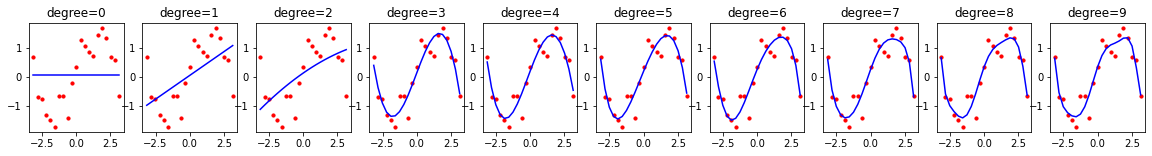

In [21]:
plt.figure(figsize=(20, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.scatter(x_train, y_train, color='r', s=10)
    plt.plot(x_train, y_train_pred_all[i], color='b')
    plt.title('degree='+ str(i))
plt.subplots_adjust(wspace=0.2)

<a id='5'></a>
# **5. Plot MSE**

Plot the MSE as a function of the polynomial degree given the vectors/lists obtained in step 4-iii: <br> Note: Be sure to add xlabel, ylabel and legend accordingly. <br>

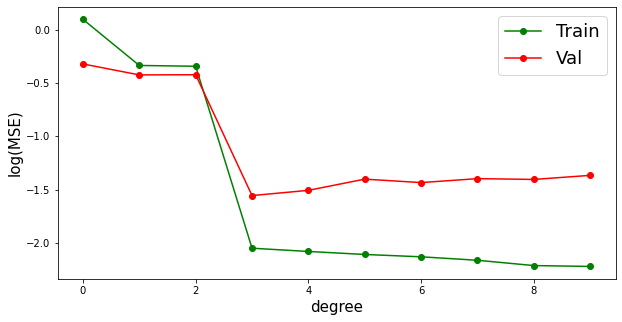

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(parameters, np.log(mse_train), color='g', marker='o', label='Train')
plt.plot(parameters, np.log(mse_val), color='r', marker='o', label='Val')
plt.xlabel('degree', fontsize=15)
plt.ylabel('log(MSE)', fontsize=15)
plt.legend(prop={'size': 18})
plt.show()

# <center>Thank You!<center>